In [1]:
!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## K-Means on a Synthetic Dataset

In [14]:
np.random.seed(0)

In [15]:
X, y = make_blobs(n_samples = 5000, centers = [[4,4],[-2,-1],[2,-3],[1,1]], cluster_std=0.9)

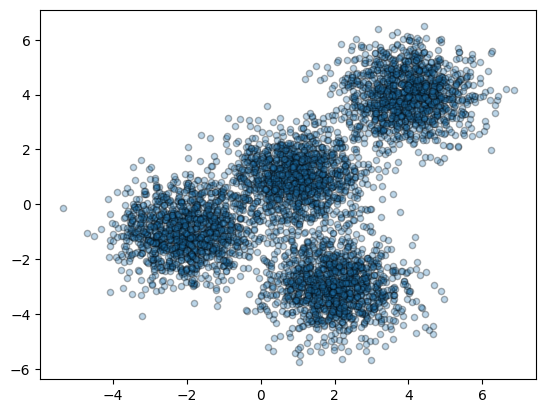

In [16]:
plt.scatter(X[:,0], X[:,1], marker = '.', alpha = 0.3, ec = 'k', s = 80)
plt.show()

## Setting up K-means

The KMeans class has many parameters that can be used, but we will be using these three:

- `init`: Initialization method of the centroids.
  - Value will be: `k-means++` 
  - `k-means++`: Selects initial cluster centres for k-means clustering in a smart way to speed up convergence.
- `n_clusters`: The number of clusters to form as well as the number of centroids to generate. 
  -  Value will be: 4 (since we have 4 centres) 
- `n_init`: Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. 
   - Value will be: 12  


Initialize `KMeans` with these parameters, where the output variable is called `k_means`.


In [17]:
k_means = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)

In [18]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [11]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

Now let's get the label for each point in the model using the `k_means.labels_` attribute and save them as `k_means_labels`.


In [12]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

## Creating the Visual Plot

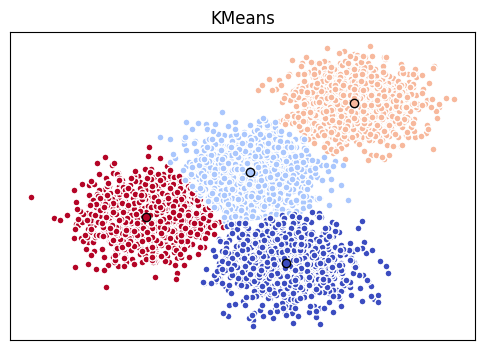

In [28]:
fig = plt.figure(figsize = (6,4))


# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.

colors = plt.cm.coolwarm_r(np.linspace(0,1,len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1,1,1)


# for loop that plots the data points and centroids
# k will range from 0-3, which will match the possible clusters that each data point is in
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are in the cluster (ex. cluster 0) are labeled as true, else they are labeled as false
    
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [20]:
colors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ]])

In [23]:
lin = np.linspace(start = 1, stop = 100, num = 50)
lin, lin.shape

(array([  1.        ,   3.02040816,   5.04081633,   7.06122449,
          9.08163265,  11.10204082,  13.12244898,  15.14285714,
         17.16326531,  19.18367347,  21.20408163,  23.2244898 ,
         25.24489796,  27.26530612,  29.28571429,  31.30612245,
         33.32653061,  35.34693878,  37.36734694,  39.3877551 ,
         41.40816327,  43.42857143,  45.44897959,  47.46938776,
         49.48979592,  51.51020408,  53.53061224,  55.55102041,
         57.57142857,  59.59183673,  61.6122449 ,  63.63265306,
         65.65306122,  67.67346939,  69.69387755,  71.71428571,
         73.73469388,  75.75510204,  77.7755102 ,  79.79591837,
         81.81632653,  83.83673469,  85.85714286,  87.87755102,
         89.89795918,  91.91836735,  93.93877551,  95.95918367,
         97.97959184, 100.        ]),
 (50,))

In [24]:
len(set(k_means_labels))

4

In [25]:
np.linspace(0,1,4)

array([0.        , 0.33333333, 0.66666667, 1.        ])

## Customer segmentation with KMeans

Imagine that you have a customer dataset, and you need to apply customer segmentation to this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, or more likely to purchase products, or subscribe to a service. A business task is to retain those customers.


# load data

In [29]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [30]:
cust_df = cust_df.drop('Address', axis = 1)
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [31]:
cust_df = cust_df.dropna()
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [32]:
X = cust_df.values[:,1:]
standardized_data = StandardScaler().fit_transform(X)

In [33]:
clusterNum = 3
k_means = KMeans(init='k-means++', n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [34]:
labels

array([0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0,

In [35]:
cust_df["Clus_km"] = labels

In [36]:
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [41]:

cust_df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,440.732000,32.350000,1.642000,5.780000,29.266000,0.930852,1.929790,0.288000,9.957800
1,378.000000,44.823529,2.823529,19.000000,206.647059,5.656059,11.496588,0.235294,8.435294
2,407.273224,40.792350,1.841530,14.530055,75.273224,2.873863,5.357377,0.191257,11.257377


In [42]:
area = np.pi * (X[:,1])

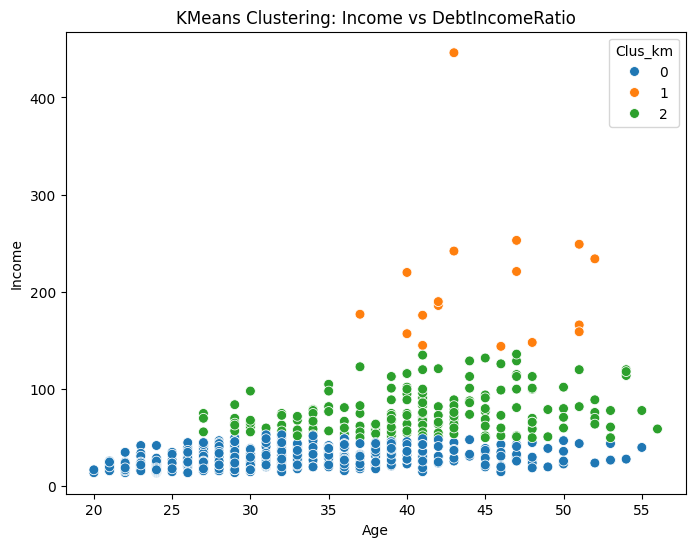

In [45]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Age', y="Income",
    hue="Clus_km", 
    palette="tab10",
    data=cust_df, s=50
)

plt.title("KMeans Clustering: Income vs DebtIncomeRatio")
plt.show()

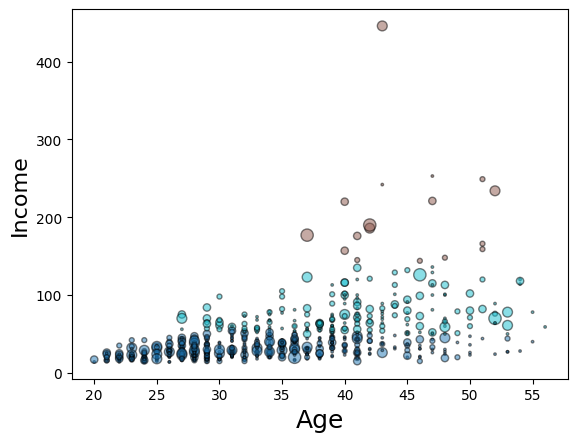

In [46]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()